# Loan Prediction with Logistic Regression
Name : Abdurrahman Al-atsary <br>

Kita akan menganalisis dan membuat model machine learning dengan menggunakan Metode regresi logistik dengan data yang diambil dari situs kaggle dengan judul Loan Prediction Problems Dataset dengan link sebagai berikut : <br>
[Unduh Dataset!!!](https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset)

## Import library and dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("train.csv")
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Data Cleaning

In [4]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

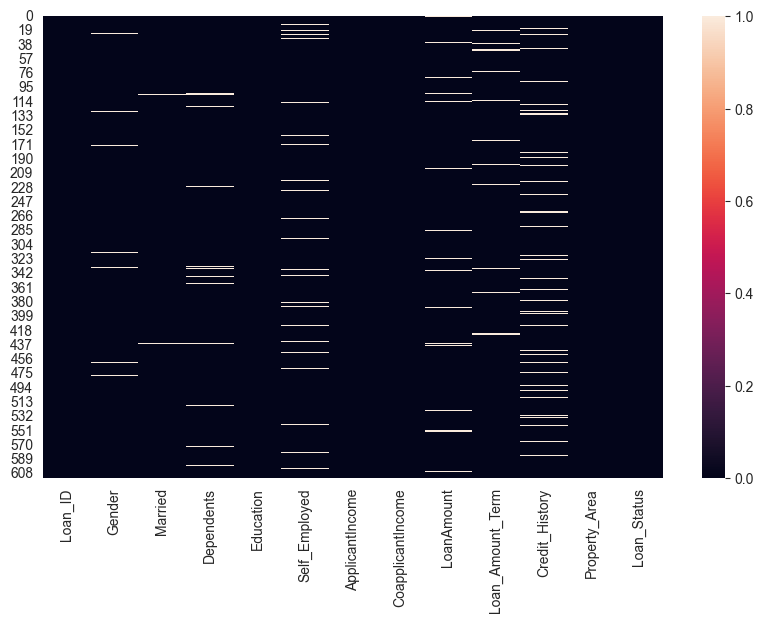

In [5]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())
plt.show()

In [6]:
missing_perc=df.isnull().sum()*100/len(df)
missing_perc

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [7]:
df["Credit_History"].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [8]:
CHM=df["Credit_History"].mode()
CHM

0    1.0
Name: Credit_History, dtype: float64

In [9]:
df["Credit_History"].fillna(CHM[0],inplace=True)

In [10]:
df["Self_Employed"].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [11]:
SEM=df["Self_Employed"].mode()
SEM

0    No
Name: Self_Employed, dtype: object

In [12]:
df["Self_Employed"].fillna(SEM[0],inplace=True)

In [13]:
df.dropna(axis=0,inplace=True)

In [14]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 553 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            553 non-null    object 
 1   Gender             553 non-null    object 
 2   Married            553 non-null    object 
 3   Dependents         553 non-null    object 
 4   Education          553 non-null    object 
 5   Self_Employed      553 non-null    object 
 6   ApplicantIncome    553 non-null    int64  
 7   CoapplicantIncome  553 non-null    float64
 8   LoanAmount         553 non-null    float64
 9   Loan_Amount_Term   553 non-null    float64
 10  Credit_History     553 non-null    float64
 11  Property_Area      553 non-null    object 
 12  Loan_Status        553 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 60.5+ KB


In [16]:
df.shape

(553, 13)

In [17]:
print("Number of Rows    : ",df.shape[0])
print("Number of Columns : ",df.shape[1])

Number of Rows    :  553
Number of Columns :  13


In [18]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,553.000000,553.000000,553.000000,553.000000,553.000000
mean,5350.018083,1659.119204,146.001808,341.663653,0.871609
std,5965.429068,3043.448229,84.052035,65.555451,0.334827
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2889.000000,0.000000,100.000000,360.000000,1.000000
50%,3812.000000,1213.000000,128.000000,360.000000,1.000000
75%,5815.000000,2306.000000,170.000000,360.000000,1.000000
max,81000.000000,41667.000000,650.000000,480.000000,1.000000


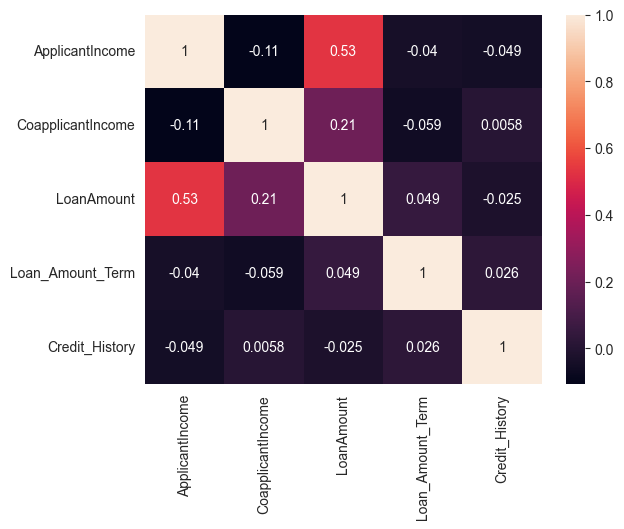

In [19]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [20]:
df.nunique()

Loan_ID              553
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      453
CoapplicantIncome    265
LoanAmount           199
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

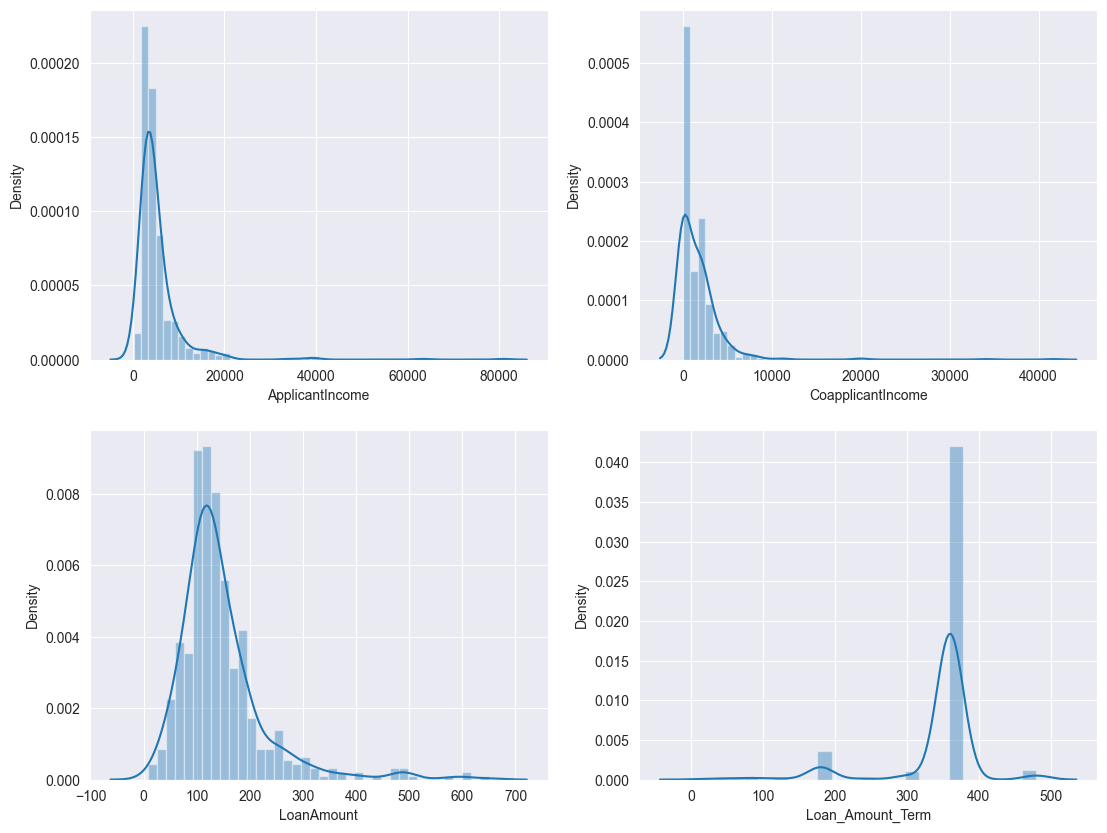

In [21]:
plt.figure(figsize=(13,10))

plt.subplot(2,2,1)
sns.distplot(df["ApplicantIncome"])

plt.subplot(2,2,2)
sns.distplot(df["CoapplicantIncome"])

plt.subplot(2,2,3)
sns.distplot(df["LoanAmount"])

plt.subplot(2,2,4)
sns.distplot(df["Loan_Amount_Term"])

plt.show()

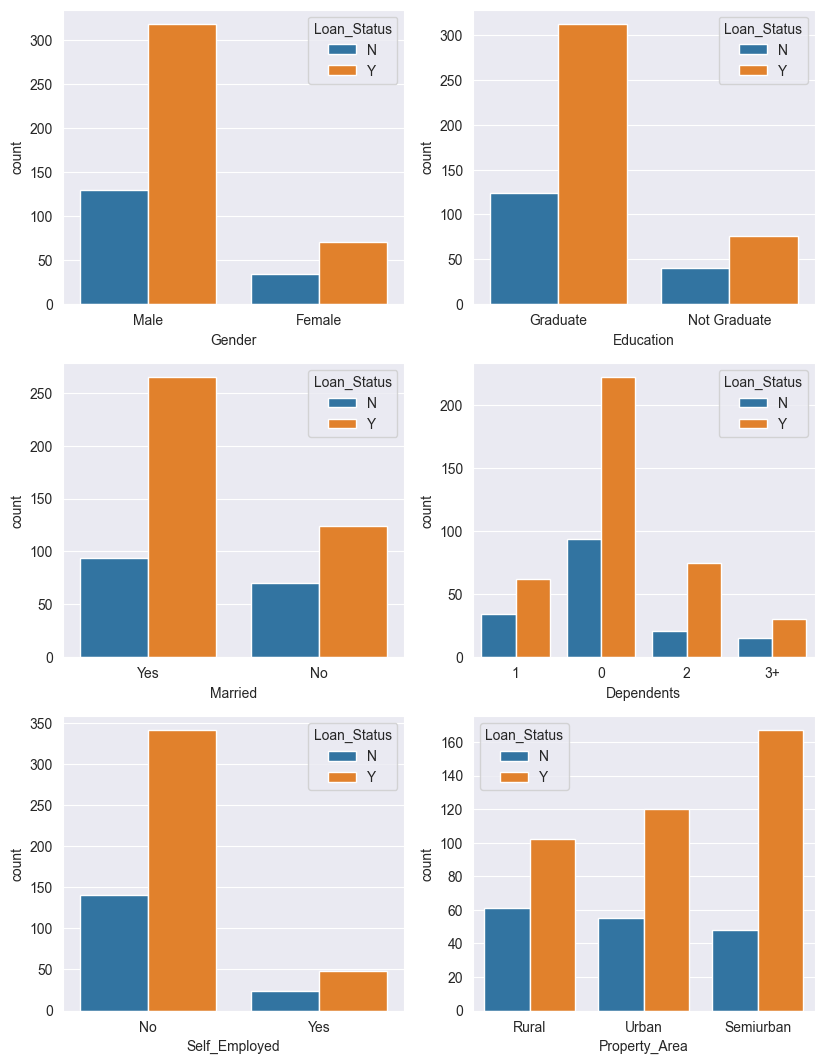

In [24]:
plt.figure(figsize=(15,13))

plt.subplot(3,3,1)
sns.countplot(data=df,x="Gender",hue="Loan_Status")

plt.subplot(3,3,2)
sns.countplot(data=df,x="Education",hue="Loan_Status")

plt.subplot(3,3,4)
sns.countplot(data=df,x="Married",hue="Loan_Status")

plt.subplot(3,3,5)
sns.countplot(data=df,x = "Dependents", hue="Loan_Status")

plt.subplot(3,3,7)
sns.countplot(data=df,x = "Self_Employed", hue="Loan_Status")

plt.subplot(3,3,8)
sns.countplot(data=df,x="Property_Area",hue="Loan_Status")

plt.show()

In [25]:
df.Dependents.value_counts()

0     316
1      96
2      96
3+     45
Name: Dependents, dtype: int64

In [26]:
df["Dependents"].replace("3+",3,inplace=True)

In [27]:
df["LoanAmount"]=df["LoanAmount"].astype("int64")
df["Loan_Amount_Term"]=df["Loan_Amount_Term"].astype("int64")
df["Credit_History"]=df["Credit_History"].astype("int64")
df["Dependents"]=df["Dependents"].astype("int64")

In [28]:
df.drop(["Loan_ID"],axis=1,inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128,360,1,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66,360,1,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360,1,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141,360,1,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267,360,1,Urban,Y


### Data Encoding

In [29]:
cols=df.select_dtypes(["object"]).columns
cols=cols[0:]
cols

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area',
       'Loan_Status'],
      dtype='object')

In [30]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
df[cols] = oe.fit_transform(df[cols])
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1.0,1.0,1,0.0,0.0,4583,1508.0,128,360,1,0.0,0.0
2,1.0,1.0,0,0.0,1.0,3000,0.0,66,360,1,2.0,1.0
3,1.0,1.0,0,1.0,0.0,2583,2358.0,120,360,1,2.0,1.0
4,1.0,0.0,0,0.0,0.0,6000,0.0,141,360,1,2.0,1.0
5,1.0,1.0,2,0.0,1.0,5417,4196.0,267,360,1,2.0,1.0


In [31]:
df["Gender"]=df["Gender"].astype("int64")
df["Married"]=df["Married"].astype("int64")
df["Self_Employed"]=df["Self_Employed"].astype("int64")
df["Property_Area"]=df["Property_Area"].astype("int64")
df["Loan_Status"]=df["Loan_Status"].astype("int64")
df["Education"]=df["Education"].astype("int64")
df["CoapplicantIncome"]=df["CoapplicantIncome"].astype("int64")

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 553 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Gender             553 non-null    int64
 1   Married            553 non-null    int64
 2   Dependents         553 non-null    int64
 3   Education          553 non-null    int64
 4   Self_Employed      553 non-null    int64
 5   ApplicantIncome    553 non-null    int64
 6   CoapplicantIncome  553 non-null    int64
 7   LoanAmount         553 non-null    int64
 8   Loan_Amount_Term   553 non-null    int64
 9   Credit_History     553 non-null    int64
 10  Property_Area      553 non-null    int64
 11  Loan_Status        553 non-null    int64
dtypes: int64(12)
memory usage: 72.3 KB


### Outlier Removal

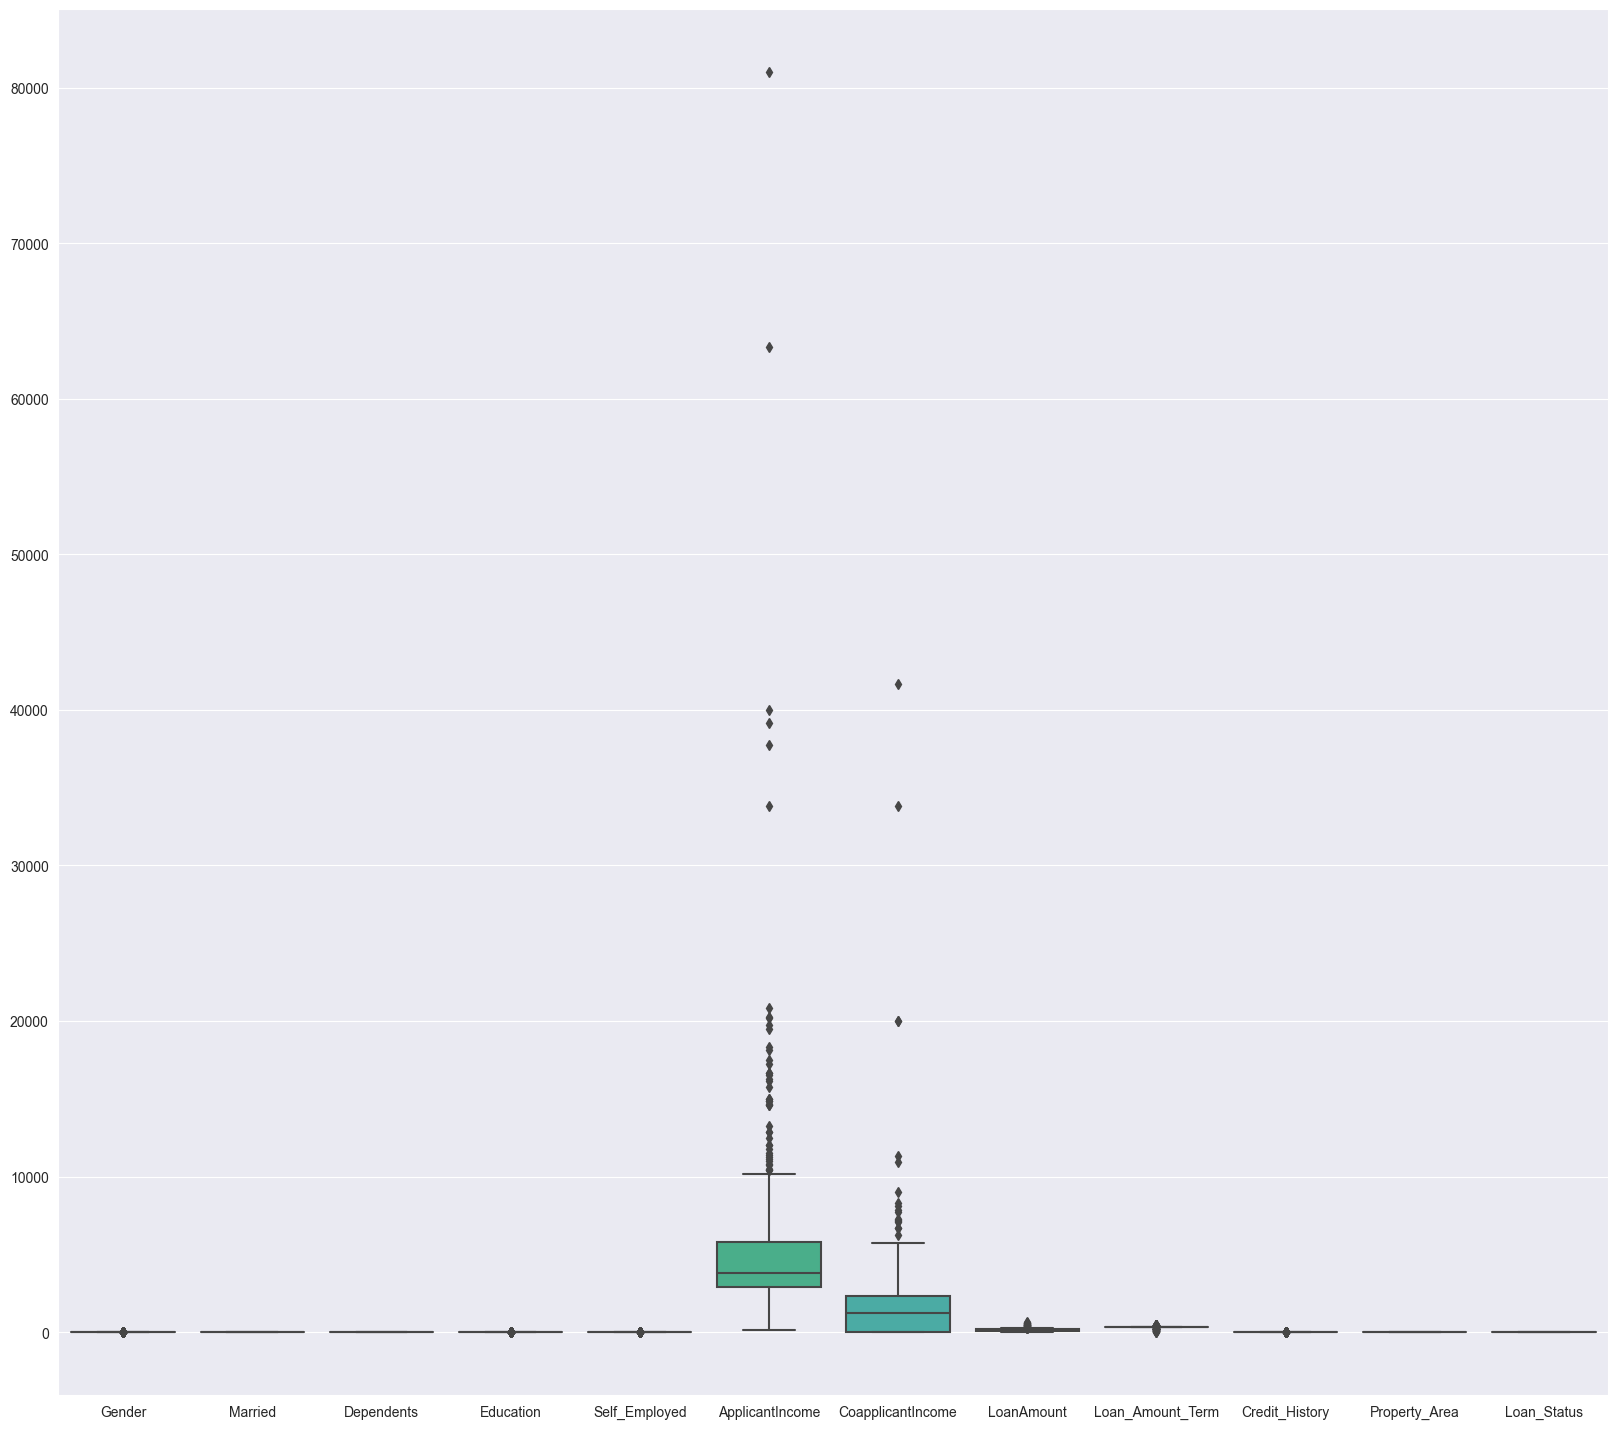

In [33]:
plt.figure(figsize=(20,18))
sns.boxplot(data=df)
plt.show()

In [34]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1

df=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]

In [35]:
df.Gender=np.sqrt(df.Gender)
df.Education=np.sqrt(df.Education)
df.Self_Employed=np.sqrt(df.Self_Employed)
df.ApplicantIncome=np.sqrt(df.ApplicantIncome)
df.CoapplicantIncome=np.sqrt(df.CoapplicantIncome)
df.LoanAmount=np.sqrt(df.LoanAmount)
df.Loan_Amount_Term=np.sqrt(df.Loan_Amount_Term)
df.Credit_History=np.sqrt(df.Credit_History)

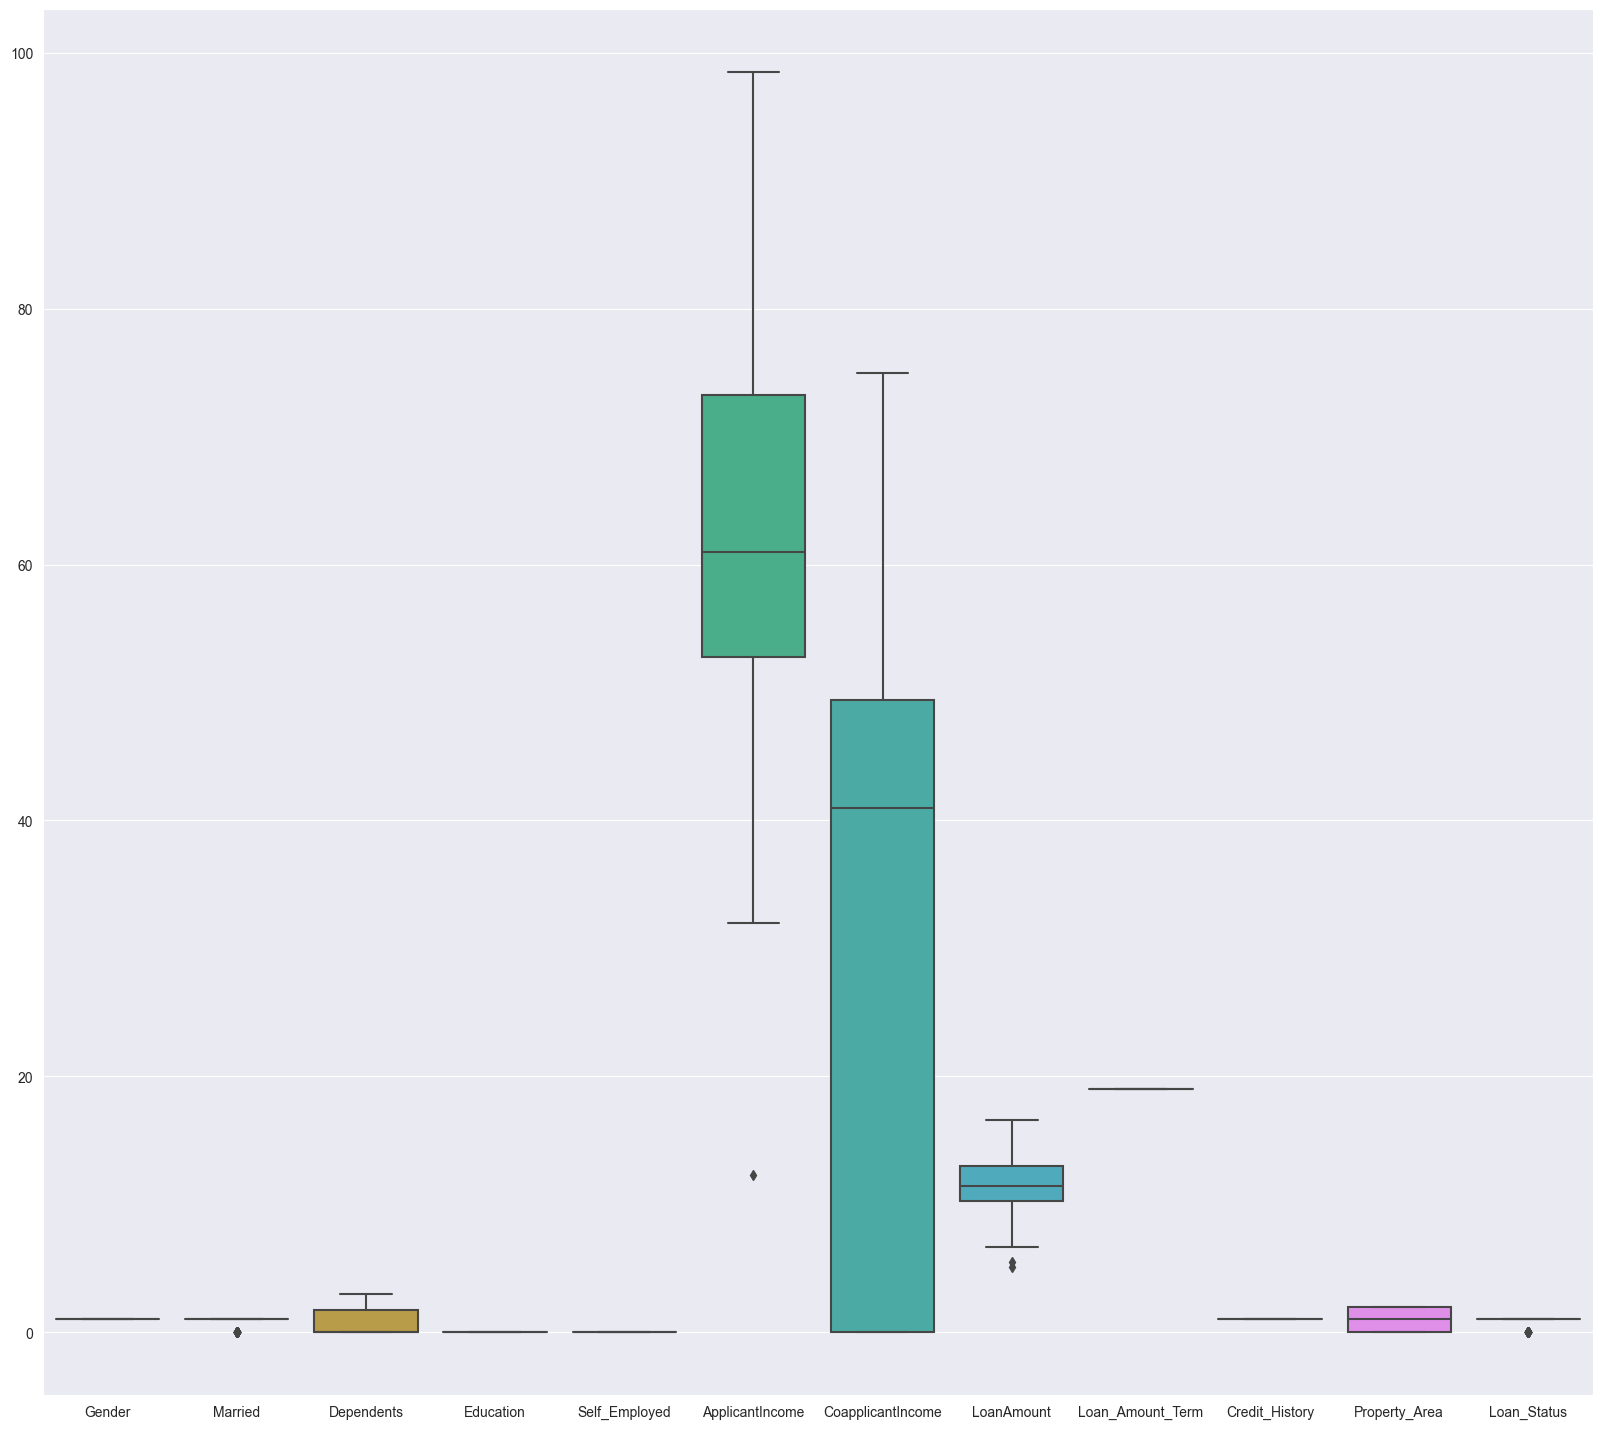

In [36]:
plt.figure(figsize=(20,18))
sns.boxplot(data=df)
plt.show()

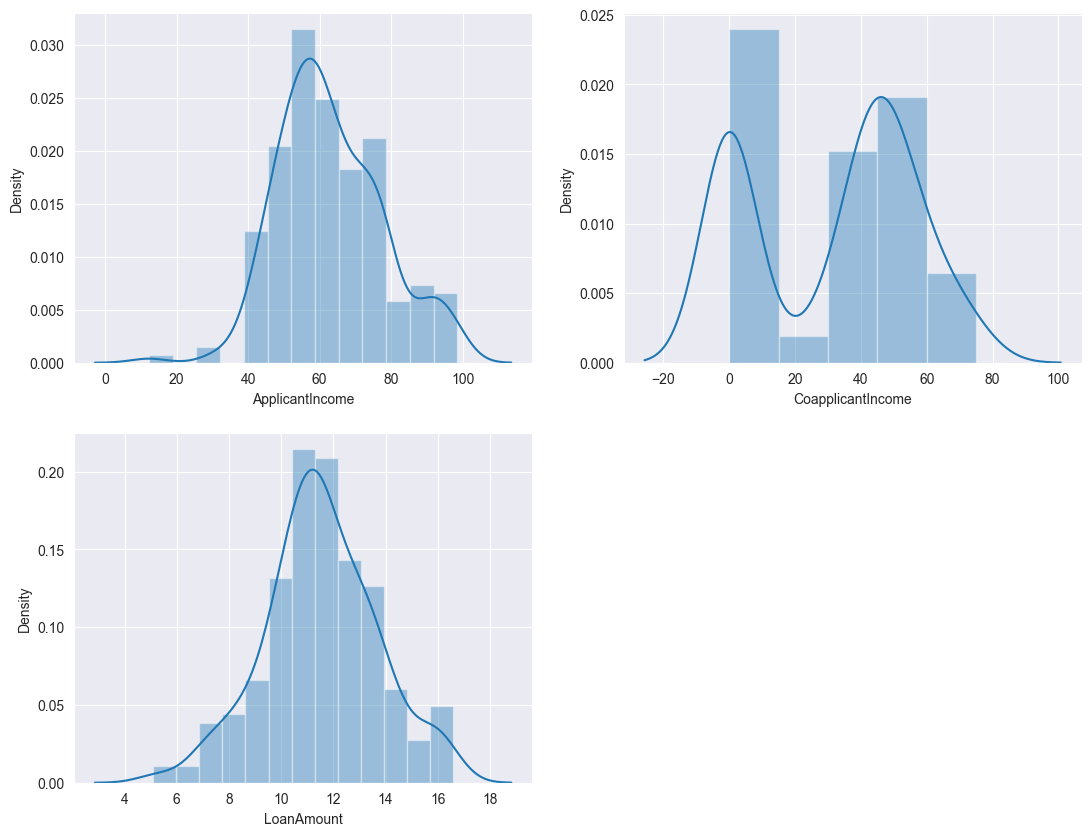

In [37]:
plt.figure(figsize=(13,10))

plt.subplot(2,2,1)
sns.distplot(df["ApplicantIncome"])

plt.subplot(2,2,2)
sns.distplot(df["CoapplicantIncome"])

plt.subplot(2,2,3)
sns.distplot(df["LoanAmount"])


plt.show()

In [39]:
x=df.iloc[:,:-1] #features
y=df.iloc[:,-1]  #target

In [40]:
y.value_counts()

1    172
0     34
Name: Loan_Status, dtype: int64

Data is not equally distributed. Hence we will use SMOTE.

In [42]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=1)

from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

X_resampled, y_resampled=SMOTE().fit_resample(x,y)
X, y=SMOTE().fit_resample(x,y)

y.value_counts().to_frame()

,Loan_Status
0,172
1,172


### Using MinMax Scaller

In [43]:
from sklearn.preprocessing import MinMaxScaler
mn=MinMaxScaler()

X=mn.fit_transform(X)

In [44]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)

    tr=model.score(xtrain,ytrain)
    te=model.score(xtest,ytest)
    print(f"Training Accuracy: {tr}\n\nTesting Accuracy: {te}\n")
    Acc=accuracy_score(ypred,ytest)

    print("Accuracy: {:2f}%".format(Acc*100))


    print("\nClassification Report :\n ",classification_report(ytest,ypred))

    return model

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [46]:
knn=mymodel(KNeighborsClassifier())

Training Accuracy: 0.8414634146341463

Testing Accuracy: 0.7857142857142857

Accuracy: 78.571429%

Classification Report :
                precision    recall  f1-score   support

           0       0.20      0.17      0.18         6
           1       0.86      0.89      0.88        36

    accuracy                           0.79        42
   macro avg       0.53      0.53      0.53        42
weighted avg       0.77      0.79      0.78        42



In [47]:
svm=mymodel(SVC())

Training Accuracy: 0.8292682926829268

Testing Accuracy: 0.8571428571428571

Accuracy: 85.714286%

Classification Report :
                precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.86      1.00      0.92        36

    accuracy                           0.86        42
   macro avg       0.43      0.50      0.46        42
weighted avg       0.73      0.86      0.79        42



In [48]:
DT=mymodel(DecisionTreeClassifier())

Training Accuracy: 1.0

Testing Accuracy: 0.7857142857142857

Accuracy: 78.571429%

Classification Report :
                precision    recall  f1-score   support

           0       0.29      0.33      0.31         6
           1       0.89      0.86      0.87        36

    accuracy                           0.79        42
   macro avg       0.59      0.60      0.59        42
weighted avg       0.80      0.79      0.79        42



In [49]:
lr=mymodel(LogisticRegression())

Training Accuracy: 0.8353658536585366

Testing Accuracy: 0.8571428571428571

Accuracy: 85.714286%

Classification Report :
                precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.86      1.00      0.92        36

    accuracy                           0.86        42
   macro avg       0.43      0.50      0.46        42
weighted avg       0.73      0.86      0.79        42



### Using Standard Scaler

In [50]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
xtrain = ss.fit_transform(xtrain)
xtest=ss.transform(xtest)

In [51]:
lr = mymodel(LogisticRegression())

Training Accuracy: 0.8292682926829268

Testing Accuracy: 0.8571428571428571

Accuracy: 85.714286%

Classification Report :
                precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.86      1.00      0.92        36

    accuracy                           0.86        42
   macro avg       0.43      0.50      0.46        42
weighted avg       0.73      0.86      0.79        42



In [52]:
knn = mymodel(KNeighborsClassifier())

Training Accuracy: 0.823170731707317

Testing Accuracy: 0.8571428571428571

Accuracy: 85.714286%

Classification Report :
                precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.86      1.00      0.92        36

    accuracy                           0.86        42
   macro avg       0.43      0.50      0.46        42
weighted avg       0.73      0.86      0.79        42



In [53]:
svm = mymodel(SVC())

Training Accuracy: 0.8292682926829268

Testing Accuracy: 0.8571428571428571

Accuracy: 85.714286%

Classification Report :
                precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.86      1.00      0.92        36

    accuracy                           0.86        42
   macro avg       0.43      0.50      0.46        42
weighted avg       0.73      0.86      0.79        42



In [55]:
DT = mymodel(DecisionTreeClassifier())

Training Accuracy: 1.0

Testing Accuracy: 0.7857142857142857

Accuracy: 78.571429%

Classification Report :
                precision    recall  f1-score   support

           0       0.33      0.50      0.40         6
           1       0.91      0.83      0.87        36

    accuracy                           0.79        42
   macro avg       0.62      0.67      0.63        42
weighted avg       0.83      0.79      0.80        42

